## Linear Support Vector Regression

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.svm import SVR, SVC # suport vector regression / classification
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE # 2차원으로 축소, 주로 시각화에 활용(비슷한 구조끼리 데이터를 정리하여 구조 이해 도움)

In [4]:
import warnings
warnings.filterwarnings("ignore")

### 보스턴 주택 가격

In [25]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [26]:
model = SVR(kernel='linear')
model.fit(x_train, y_train)

SVR(kernel='linear')

In [27]:
model

SVR(kernel='linear')

In [28]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7301440626703763
Test Data Score: 0.5851987031024235


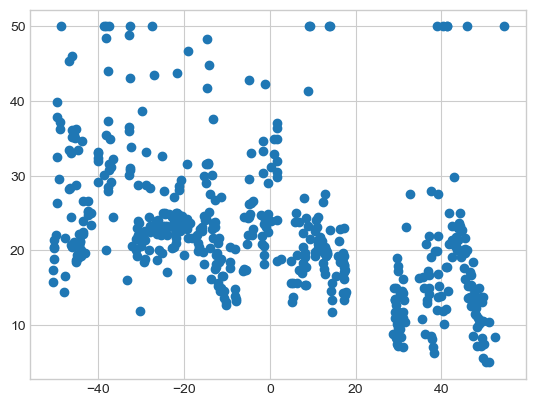

In [29]:
x_comp = TSNE(n_components=1).fit_transform(x) # 저차원 변환
plt.scatter(x_comp, y); # 시각화

In [30]:
x.shape

(506, 13)

In [31]:
x_comp.shape  # 13개의 feature를 1개로 줄여줌.

(506, 1)

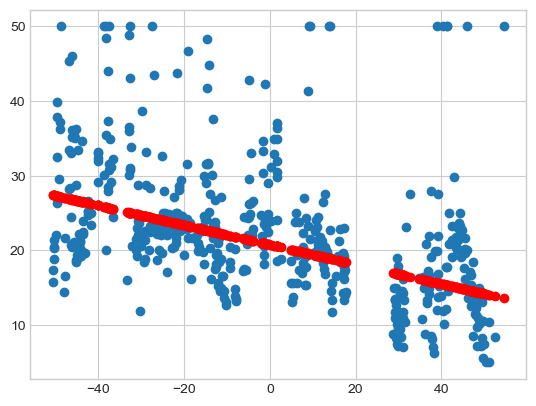

In [33]:
model.fit(x_comp, y)
predict = model.predict(x_comp)
plt.scatter(x_comp, y)
plt.scatter(x_comp, predict, color = 'r')

In [232]:
predict.shape

(506,)

In [233]:
y.shape

(506,)

In [234]:
# model.score

In [235]:
# pip라인을 생성 (standardscler -> SVR)

In [45]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

result = cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


In [46]:
result

{'fit_time': array([0.01092815, 0.01036286, 0.01008606, 0.00959897, 0.01042199]),
 'score_time': array([0.00172091, 0.00175714, 0.00170898, 0.0017302 , 0.001683  ]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [42]:
result["test_score"].mean()

0.4548213708618275

In [49]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}] # margin의 폭 지정 (값이 커질수록 폭도 커진다. -> hard vs soft)

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [50]:
gs.best_estimator_ # 가장 성능이 좋은 model

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 당뇨병
- TSNE 를 이용하여 저차원 변경 후 시각화
- cross_validate를 이용한  model 성능 측정
- GridSearch를 이용한 최적의 Parameter 추정

In [84]:
x,y = load_diabetes(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [85]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
model = SVR(kernel= 'linear')
model.fit(x_train, y_train)

SVR(kernel='linear')

In [87]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.4944459458129058
Test Data Score: 0.4779803075341382


In [88]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

result = cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )
result

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00661612, 0.00584292, 0.00522685, 0.0058434 , 0.00711513]),
 'score_time': array([0.00137711, 0.0013833 , 0.00128794, 0.00144982, 0.00137496]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [89]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto', 'rbf'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}] # magin 의 폭 지정(값이 커질수록 폭도 커지게된다. -> hard vs soft)

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto', 'rbf']}],
             verbose=True)

In [90]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 보스턴 주택 가격

In [91]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [92]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
model = SVR(kernel='rbf')
model.fit(x_train, y_train)

SVR()

In [94]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.6435026509649833
Test Data Score: 0.7456396339614586


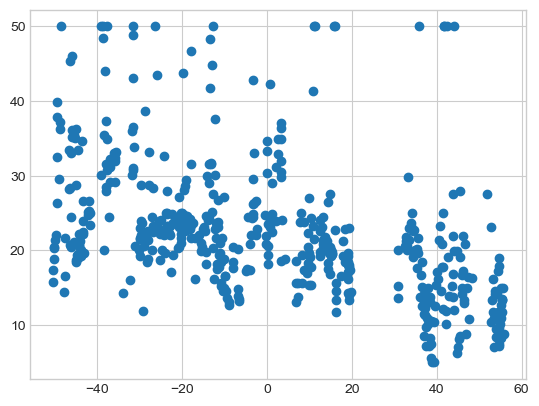

In [95]:
x_comp = TSNE(n_components=1).fit_transform(x)
plt.scatter(x_comp, y)

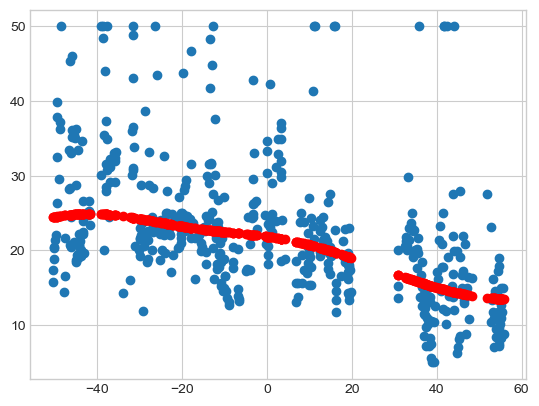

In [96]:
model.fit(x_comp, y)
predict = model.predict(x_comp)
plt.scatter(x_comp, y)
plt.scatter(x_comp, predict, color = 'r');

In [97]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    3.1s finished


{'fit_time': array([0.01194501, 0.01207113, 0.01169896, 0.01135087, 0.01163316]),
 'score_time': array([0.00521684, 0.00491977, 0.00579906, 0.00460625, 0.00494695]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [98]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

In [99]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
'model__C': [1.0, .1, .01],
'model__epsilon': [1, .1, .01]}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [100]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=0.01, gamma='auto'))])

### 당뇨병

In [102]:
x,y = load_diabetes(return_X_y= True)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [103]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [104]:
mode = SVR(kernel= 'rbf')
model.fit(x_train, y_train)

SVR()

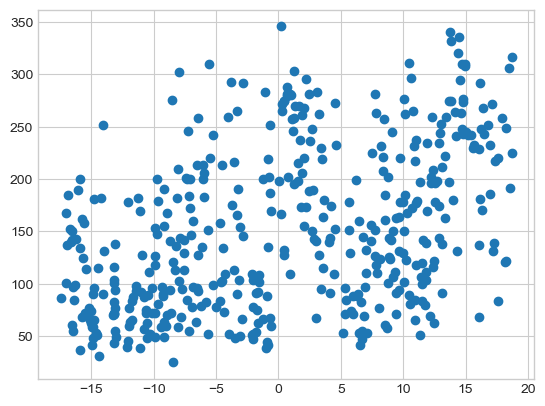

In [106]:
x_comp = TSNE(n_components=1).fit_transform(x)
plt.scatter(x_comp, y)

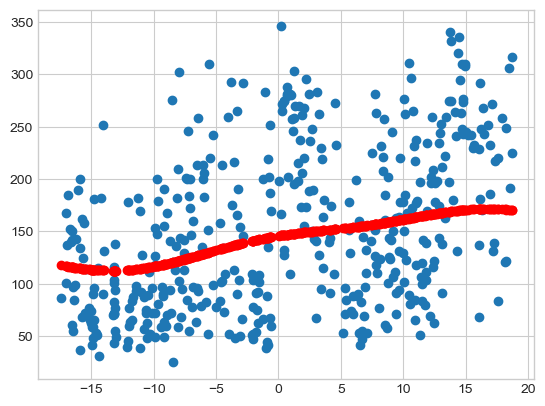

In [107]:
model.fit(x_comp, y)
predict = model.predict(x_comp)
plt.scatter(x_comp, y)
plt.scatter(x_comp, predict, color = 'r')

In [109]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(estimator = estimator,
                X =x, y=y,
                cv =5,
                n_jobs = multiprocessing.cpu_count(),
                verbose= True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    3.3s finished


{'fit_time': array([0.00927424, 0.00925517, 0.00950003, 0.00902677, 0.00912285]),
 'score_time': array([0.00387883, 0.004215  , 0.00384879, 0.00398517, 0.00363111]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [120]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel' : ['rbf', 'ploynomial','sigmoid'],
'model__C': [1.0, .1, .01],
'model__epsilon': [1, .1, .01]}]

gs = GridSearchCV(
                estimator= pipe, param_grid= param_grid,
                cv =5,
                n_jobs=multiprocessing.cpu_count(),
                verbose=True
)
gs.fit(x,y)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1, 0.1, 0.01],
                          'model__kernel': ['rbf', 'ploynomial', 'sigmoid']}],
             verbose=True)

In [127]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1, kernel='sigmoid'))])

In [133]:
model = gs.best_estimator_
model.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1, kernel='sigmoid'))])

In [134]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.37509090121727784
Test Data Score: 0.3508846518645191


## Linear SVC

### 유방암

In [144]:
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [145]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [146]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [147]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9912087912087912
Test Data Score: 0.956140350877193


In [148]:
def make_meshgrid(x, y, h=.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

In [149]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [150]:
x_comp = TSNE(n_components=2).fit_transform(x) # 저차원 변환
x0, x1 = x_comp[:, 0], x_comp[:, 1]
xx, yy = make_meshgrid(x0, x1)

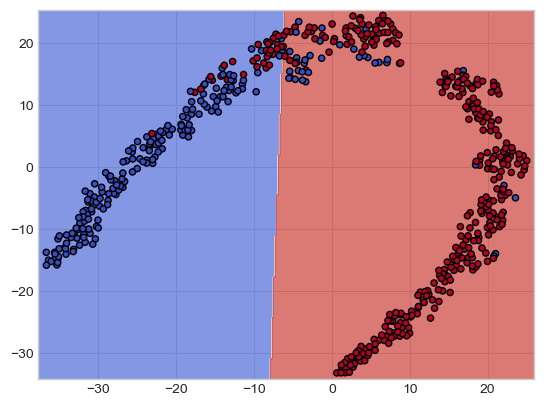

In [154]:
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [155]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    3.5s finished


{'fit_time': array([0.00417018, 0.00322199, 0.0035429 , 0.00319791, 0.00352597]),
 'score_time': array([0.0005219 , 0.00047779, 0.00050688, 0.00048399, 0.00058699]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [156]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [157]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

### 붓꽃

In [159]:
x,y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [160]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [161]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)


SVC(kernel='linear')

In [162]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.975
Test Data Score: 0.9666666666666667


In [163]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

result = cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

result['test_score'].mean()

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


0.9666666666666668

In [164]:
# pipe = make_pipeline(StandardScaler(), SVC(kernel='linear')) --> 아까는 된거 같았는데...
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto', 'linear','sigmoid','rbf'],
               'model__C':[1.0, 0.1, 0.01]
               }]

gs = GridSearchCV(estimator=pipe,
                    param_grid= param_grid,
                    cv=5,
                    n_jobs=multiprocessing.cpu_count(),
                    verbose=True
                    )
gs.fit(x,y)
                    

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto', 'linear', 'sigmoid',
                                           'rbf']}],
             verbose=True)

In [165]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

## Kernel SVC

### 유방암

In [184]:
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [185]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [186]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [187]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')
# x의 차원에서

Train Data Score: 0.9868131868131869
Test Data Score: 0.9649122807017544


In [188]:
x_comp = TSNE(n_components=2).fit_transform(x) # 저차원 변환
x0, x1 = x_comp[:, 0], x_comp[:, 1]
xx, yy = make_meshgrid(x0, x1)

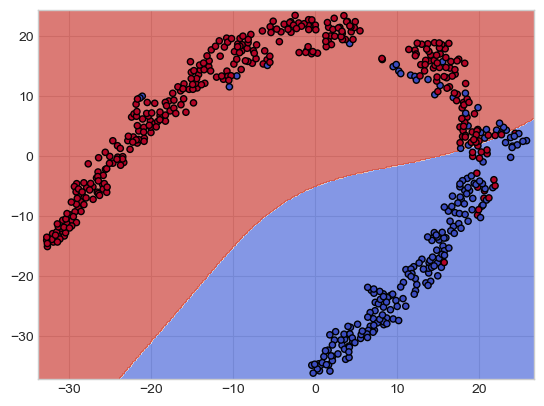

In [172]:
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [173]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    3.3s remaining:    5.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    3.3s finished


{'fit_time': array([0.00518298, 0.00519609, 0.00550294, 0.00533128, 0.00516295]),
 'score_time': array([0.00179386, 0.00168276, 0.00187016, 0.00170088, 0.00166917]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [174]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [175]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [178]:
model = gs.best_estimator_
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9218195250191902
Test Data Score: 0.8872285308405696


### 붓꽃

In [201]:
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [202]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [203]:
model =SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [204]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.975
Test Data Score: 0.9666666666666667


In [205]:
x_comp = TSNE(n_components=2).fit_transform(x) # 저차원 변환
x0, x1 = x_comp[:, 0], x_comp[:, 1]
xx, yy = make_meshgrid(x0, x1)

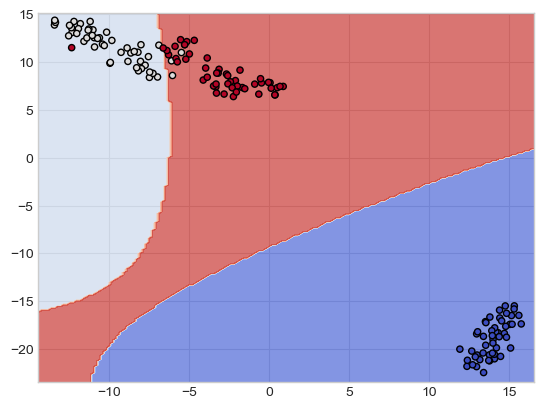

In [206]:
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [207]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00122309, 0.0008769 , 0.00088668, 0.00096178, 0.00101399]),
 'score_time': array([0.00036788, 0.00034189, 0.0003531 , 0.00039315, 0.00040603]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [208]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel= 'rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [209]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [210]:
model = gs.best_estimator_
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.975
Test Data Score: 0.9666666666666667


# 정리

### 와인

In [ ]:
# 

In [ ]:
x, y = load_wine(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)